<center><img src="https://github.com/girishksahu/INSAID2021/blob/SMART_AI_Learning/INSAID_Full%20Logo.png?raw=true" width="240" height="100" /></center>

<h1><center>Machine Learning Advanced Project - World Happiness Report for NGO</center><h1>

<center><img width=40% src="https://github.com/girishksahu/INSAID2021-ML-Advanced-World_Happiness_Report/blob/SMART_AI_Learning/happiness-foundation-logo.jpg?raw=true"></center>

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Importing Libraries**](#Section3)<br>
  - **3.1** [**Version Check**](#Section31)
  - **3.2** [**Importing Libraries**](#Section32)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)
  - **4.2** [**Data Information**](#Section42)

**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Data Pre-profiling**](#Section51)<br>
  - **5.2** [**Data Pre-Processing**](#Section52)<br>
  - **5.3** [**Data Post-profiling**](#Section53)<br>

**6.** [**Exploratory Data Analysis**](#Section6)<br>
**7.** [**Data Post-Processing**](#Section7)<br>
  - **7.1** [**Handle Missing Value**](#Section71)<br> 
  - **7.2** [**Data Preparation**](#Section72)<br>
  - **7.3** [**Data Scaling**](#Section73)<br>

**8.** [**Model Development & Evaluation**](#Section8)<br>
**9.** [**Summarization**](#Section9)<br>
  - **9.1** [**Conclusion**](#Section91)<br>

---
<a name = Section1></a>
# **1. Introduction**
---

- Your client for this project is an NGO.

    - The Happiness Foundation has been around for the last two decades and spans across more than 150 countries.
    - The NGO comprises professionals and grassroots workers from various walks of life.
    - The team includes young passionate individuals from different backgrounds who derive contentment by helping the needy, poor, and down-trodden.
    
**<h3>Current Scenario:</h3>**

- The foundation has gathered teams from across the world who have been invited for an exhibition of a system that determines the happiness of a particular individual based on certain factors.

---
<a name = Section2></a>
# **2. Problem Statement**
---

- **The current process suffers from the following problems:**
  - With the help of Gallup World Polls, they determine the happiness of individuals across various countries.
  - The current process is a resource and time-consuming given that data has to be collected from individuals, processed, analyzed, and then determined what the future results of polls will look like.
  - They want to automate the process of predicting the future poll results based on certain given factors.

- The company has hired you as data science consultant. 
    - They want to supplement their analysis and prediction with a more feasible approach.

<a name = Section21></a>
### **Your Role**

- You are given datasets of the world happiness report with Life Ladder indicating the happiness score of the individual.
- Your task is to build a regression model using the datasets.
- Because there was no machine learning model for this problem in the foundation, you don’t have a quantifiable win condition. You need to build the best possible model.

<a name = Section21></a>
### **Project Deliverables**
- Deliverable: Predicts the Life Ladder score of individuals.
- Machine Learning Task: Regression
- Target Variable: Life Ladder
- Win Condition: N/A (best possible model)

<a name = Section21></a>
### **Evaluation Metric**

- The model evaluation will be based on the R2 score.

<center><img src="https://github.com/girishksahu/INSAID2021-ML-Advanced-World_Happiness_Report/blob/SMART_AI_Learning/Global-Happiness-Levels-2021.png?raw=true"></center>

---
<a name = Section3></a>
# **3. Importing Libraries**
---

<a name = Section31></a>
### **3.1 Version Check**

In [197]:
from platform import python_version

# Printing version of Python to ensure correct version is used for this project
print("python version", python_version())
#!pip list
#!pip show


python version 3.8.5


<a name = Section32></a>
### **3.2 Importing Libraries**

In [198]:
#------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
from scipy.stats import randint as sp_randint                       # For initializing random integer values
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
import sklearn.metrics
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler                    # Importing to scale the features
from sklearn.model_selection import train_test_split                # Importing to split the data into train and test data
from sklearn.neighbors import KNeighborsRegressor                  # To instantiate a KNN Classifier
from sklearn.ensemble import RandomForestClassifier                 # To instantiate a Random Forest Classifier
from sklearn.metrics import accuracy_score                          # To calculate the accuracy of classifiers
from sklearn.model_selection import KFold                           # To create k folds for cross validation
from sklearn.model_selection import cross_validate                  # To calculate cross validation scores
from sklearn.model_selection import GridSearchCV                    # To tune the models   
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

#Printing version of few key libraries to ensure correct once are used
print ("pandas version", pd.__version__)
print ("numpy version", np.__version__)
print ("seaborn version", sns.__version__)
print ("sklearn version", sklearn.__version__)

pandas version 1.1.3
numpy version 1.19.2
seaborn version 0.11.0
sklearn version 0.24.2


---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

- The **Training dataset** contains happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity.The column **Life Ladder** has the individual’s happiness score.This is the data that we have to predict for Life Ladder.


| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 1559 | 12 | 146.2 KB | 

<br>

| ID | Feature Name | Description of the feature |
| :-- | :--| :--| 
|01| **Country name**   | Represents the country name of the individual                     |
|02| **Year** | Represents the year when the poll was conducted               |
|03| **Log GDP per capita**        | Log of GDP per capita of the country (estimated by the foundation)            |
|04| **Social support**        | Represents the social support in the country (estimated by the foundation)               |
|05| **Healthy life expectancy at birth**          | Represents the healthy life expectancy at birth in the country (estimated by the foundation)                     |
|06| **Freedom to make life choices**      | Represents the freedom of choice score for the country (estimated by the foundation)                 |
|07| **Generosity**           | Represents the generosity factor based on many polled factors (estimated by the foundation)
|08| **Perceptions of corruption**     | Represents an individual’s view on corruption in the country. |
|09| **Positive affect**     | Represents the average score of happiness, laugh, and enjoyment scores of the concerned individual|
|10| **Negative affect**        | Represents the average score of sadness, worry, and anger scores of the concerned individual|
|11| **ID**          | Identifier of the individual |
|12| **Life Ladder**          | Represents the happiness score or subjective well-being |

- The **Test dataset** consists of happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity and **Life Ladder** need to be predicted.

| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 390 | 11 | 33.5 KB | 

<br>

- Load World Happiness data to be used for Training and Validation

In [199]:
# ID is unique ID for record and can be used as label for index
happiness_master_data = pd.read_csv("https://raw.githubusercontent.com/girishksahu/INSAID2021-ML-Advanced-World_Happiness_Report/SMART_AI_Learning/train_data.csv", index_col='ID')

# Get the dimesions of data
print('Shape of the Training and Validation dataset:', happiness_master_data.shape)

# Output first 5 data rows
happiness_master_data.head()


Shape of the Training and Validation dataset: (1559, 11)


Country name  year  Log GDP per capita  Social support  \
ID                                                            
862        Jordan  2008               9.343           0.766   
534       Estonia  2013              10.299           0.901   
1649       Sweden  2018              10.881           0.931   
1682   Tajikistan  2006               7.554           0.724   
925        Kuwait  2014              10.945             NaN   

      Healthy life expectancy at birth  Freedom to make life choices  \
ID                                                                     
862                              64.22                           NaN   
534                              67.48                         0.754   
1649                             72.60                         0.942   
1682                             60.64                         0.702   
925                              65.80                           NaN   

      Generosity  Perceptions of corruption  Positive affect  Negative affect  \
ID                                                                              
862       -0.127                      0.709            0.669            0.331   
534       -0.201                      0.726            0.702            0.199   
1649       0.077                      0.263            0.823            0.161   
1682      -0.088                      0.768            0.566            0.195   
925          NaN                        NaN              NaN              NaN   

      Life Ladder  
ID                 
862         4.930  
534         5.367  
1649        7.375  
1682        4.613  
925         6.180

- Load World Happiness Test Data to be used for Life Ladder Prediction

In [200]:
# ID is unique ID for record and can be used as label for index
happiness_test_data = pd.read_csv("https://raw.githubusercontent.com/girishksahu/INSAID2021-ML-Advanced-World_Happiness_Report/SMART_AI_Learning/test_data.csv", index_col='ID')

# Get the dimesions of data
print('Shape of the Test dataset to be used for Prediction:', happiness_test_data.shape)

# Output first 5 data rows
happiness_test_data.head()

Shape of the Test dataset to be used for Prediction: (390, 10)


Country name  year  Log GDP per capita  Social support  \
ID                                                            
1614        Spain  2020              10.488           0.935   
1405       Poland  2017              10.314           0.882   
974       Lebanon  2012               9.800           0.713   
1055     Malaysia  2011               9.966           0.770   
307        Canada  2020              10.730           0.931   

      Healthy life expectancy at birth  Freedom to make life choices  \
ID                                                                     
1614                             75.00                         0.783   
1405                             68.90                         0.831   
974                              65.36                         0.621   
1055                             65.76                         0.840   
307                              74.00                         0.887   

      Generosity  Perceptions of corruption  Positive affect  Negative affect  
ID                                                                             
1614      -0.121                      0.730            0.686            0.317  
1405      -0.122                      0.639            0.677            0.203  
974       -0.006                      0.856            0.499            0.339  
1055      -0.016                      0.842            0.887            0.155  
307        0.050                      0.434            0.796            0.307

In [201]:
# Check for any missing values
any(happiness_master_data.isna().sum())

True

In [202]:
#check if any duplicate row
any(happiness_master_data.duplicated())

False

<a name = Section41></a>
### **4.1 Data Description**

- In this section we will get **information about the data** and see some observations.

In [203]:
print('Describe Feature Length:', len(happiness_master_data.describe(include='all').columns))
happiness_master_data.describe(include=[np.int64]).filter(items=['count'], axis=0)

Describe Feature Length: 11


year
count  1559.0

In [204]:
#Basic statistical details for numeric variables

happiness_master_data.describe(include=[np.float64])

Log GDP per capita  Social support  Healthy life expectancy at birth  \
count         1533.000000     1549.000000                       1522.000000   
mean             9.362995        0.812689                         63.331680   
std              1.160240        0.118762                          7.478307   
min              6.635000        0.290000                         32.300000   
25%              8.460000        0.753000                         58.340000   
50%              9.456000        0.835000                         65.180000   
75%             10.332000        0.905000                         68.535000   
max             11.648000        0.987000                         77.100000   

       Freedom to make life choices   Generosity  Perceptions of corruption  \
count                   1537.000000  1488.000000                1473.000000   
mean                       0.741882     0.000343                   0.748248   
std                        0.142326     0.163385                   0.186708   
min                        0.260000    -0.335000                   0.035000   
25%                        0.646000    -0.113000                   0.691000   
50%                        0.763000    -0.025000                   0.804000   
75%                        0.855000     0.091000                   0.873000   
max                        0.985000     0.698000                   0.983000   

       Positive affect  Negative affect  Life Ladder  
count      1542.000000      1545.000000  1559.000000  
mean          0.708551         0.267644     5.469321  
std           0.108029         0.084431     1.113280  
min           0.322000         0.083000     2.375000  
25%           0.623000         0.206000     4.649500  
50%           0.721000         0.258000     5.374000  
75%           0.798000         0.319000     6.272500  
max           0.944000         0.705000     8.019000

**Observations:**
- Total count for all numeric variables is not same (1559) which confirms that there are missing values.
- Most of them appears to mean value similar to median
- Variables like **Generosity** appears to be highly skewed.

In [205]:
happiness_master_data.describe(include=[np.object])

Country name
count          1559
unique          165
top          Mexico
freq             15

In [206]:
# Columns list can be handy and useful for further steps
happiness_master_data.columns

Index(['Country name', 'year', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect', 'Life Ladder'],
      dtype='object')

<a name = Section42></a>
### **4.2 Data Information**

- In this section we will see the **information about the types of the features**.

In [207]:
# Check column data types and any null values in Train Dataset
happiness_master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1559 entries, 862 to 1126
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1559 non-null   object 
 1   year                              1559 non-null   int64  
 2   Log GDP per capita                1533 non-null   float64
 3   Social support                    1549 non-null   float64
 4   Healthy life expectancy at birth  1522 non-null   float64
 5   Freedom to make life choices      1537 non-null   float64
 6   Generosity                        1488 non-null   float64
 7   Perceptions of corruption         1473 non-null   float64
 8   Positive affect                   1542 non-null   float64
 9   Negative affect                   1545 non-null   float64
 10  Life Ladder                       1559 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 146.2+ KB


**Observations:**

- Total Non-Null count for each column is not same as 1559 which means there are missing values.

- There are **11 Numerical features** and **1 Categorical feature**

In [208]:
# Check column data types and any null values in Test Dataset
happiness_test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 1614 to 1600
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      390 non-null    object 
 1   year                              390 non-null    int64  
 2   Log GDP per capita                380 non-null    float64
 3   Social support                    387 non-null    float64
 4   Healthy life expectancy at birth  372 non-null    float64
 5   Freedom to make life choices      380 non-null    float64
 6   Generosity                        372 non-null    float64
 7   Perceptions of corruption         366 non-null    float64
 8   Positive affect                   385 non-null    float64
 9   Negative affect                   388 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 33.5+ KB


In [209]:
# Get list of numerical variables
s = (happiness_master_data.dtypes == 'int64')
numeric_cols = list(s[s].index)

print("Numeric variables INT:")
print(numeric_cols)

Numeric variables INT:
['year']


In [210]:
# Get list of numerical variables
s = (happiness_master_data.dtypes == 'float64')
numeric_cols = list(s[s].index)

print("Numeric variables Float:")
print(numeric_cols)

Numeric variables Float:
['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect', 'Life Ladder']


<a name = Section5></a>

---
# **5. Data Pre-Processing**
---

<a name = Section51></a>
### **5.1 Data Pre-Profiling**

- For **quick analysis** pandas profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column **statistics** are presented in an interactive HTML report.

In [211]:
profile = ProfileReport(df=happiness_master_data)
profile.to_file(output_file='World Happiness Report Pre Profiling Report.html')
print('Accomplished!')


Accomplished!


**Observations:**

- The report shows that there are a **total** of **12 features** out of which 11 are **numerical** and 1 is **categorical** type.
- All the feature does not contain same number of observations as 1559.

- **Log GDP per capita** feature has 1.7% value missing.
- **socialsupport** feature has 0.6% value missing and distribution appears negatively skewed and has outliers.
- **Healthy life expectancy at birth** feature has 2.4% value missing and distribution appears negatively skewed and has outliers.
- **Freedon to make life choices** feature has 1.4% value missing and distribution appears negatively skewed and has outliers.
- **Generosity** feature has 4.6% value missing
- **Perceptions of corruption** feature has 5.5% value missing and distribution appears negatively skewed and has outliers.
- **Positive affect** feature has 1.1% value missing.
- **Negative affect** feature has 0.9% value missing.

- For detailed information, please check **World Happiness Report Pre Profiling Report.html** file.

<a name = Section52></a>
### **5.2 Data Pre-Processing**

- There are missing values and we need to address before Model Evaluation

1. Missing Completely at Random (MCAR)
    -  The missing values on a given variable (Y) are not associated with other variables in a given data set or with the variable (Y) itself. In other words, there is no particular reason for the missing values.
2. Missing at Random (MAR)
    - MAR occurs when the missingness is not random, but where missingness can be fully accounted for by variables where there is complete information.
3. Missing Not at Random (MNAR)
    - Missingness depends on unobserved data or the value of the missing data itself.

<a name = Section53></a>
### **5.3 Data Post-Profiling**

- We can run the report to get latest information

In [212]:
# post_profile=ProfileReport(df=happiness_master_data)
# post_profile.to_file(output_file='World Happiness Report Post Profiling Report.html')
# print('Accomplished!')

**Observations:**

- TBD

<a name = Section6></a>

---
# **6. Exploratory Data Analysis**
---

**NOTE**:  

- Exploratory Data Analysis will explore all the features and their relationship with other features
- Both non-graphical and graphical method will be used as applicable to respective features
- Both univariate and bivariate method be used as applicable to respective features

**Q: What is the distribution of Country?**

In [213]:
happiness_master_data['Country name'].unique()

array(['Jordan', 'Estonia', 'Sweden', 'Tajikistan', 'Kuwait', 'Zambia',
       'Trinidad and Tobago', 'Vietnam', 'Costa Rica', 'Bolivia',
       'Kazakhstan', 'Iran', 'Laos', 'Turkmenistan', 'Germany', 'Poland',
       'Belarus', 'Afghanistan', 'Hungary', 'United Kingdom', 'Serbia',
       'Chile', 'Israel', 'Turkey', 'Moldova', 'Ecuador', 'Liberia',
       'Cambodia', 'Bulgaria', 'Sierra Leone', 'Lithuania', 'Mexico',
       'New Zealand', 'Croatia', 'Honduras', 'Russia', 'Thailand',
       'Burkina Faso', 'Gabon', 'Nigeria', 'Central African Republic',
       'Congo (Brazzaville)', 'Djibouti', 'Cyprus', 'Madagascar',
       'Paraguay', 'Pakistan', 'Slovenia', 'Kyrgyzstan', 'Ukraine',
       'Benin', 'Cameroon', 'Tunisia', 'Canada', 'El Salvador', 'Spain',
       'Malaysia', 'Venezuela', 'United States', 'Colombia', 'Somalia',
       'Guatemala', 'Bhutan', 'India', 'Mali', 'Norway', 'Portugal',
       'Uruguay', 'Myanmar', 'France', 'Bosnia and Herzegovina',
       'Albania', 'Kosovo'

In [214]:
import plotly.express as px
fig = px.treemap(happiness_master_data['Country name'], path=[px.Constant('Country'), 'Country name'], color='Country name', hover_data=['Country name'])
fig.show()

In [215]:
# fig = px.pie(happiness_master_data['Country name'], names='Country name', width=1000, height=5000)
# fig.show()

**Q: What are top 5 Country with respect to Log GDP per Capita?**

In [216]:
gdpCountry=happiness_master_data[['Country name','Log GDP per capita']]
gdpvscountry= gdpCountry.groupby(by='Country name').median().sort_values(by='Log GDP per capita',ascending= False) 
gdpvscountry[:5]

Log GDP per capita
Country name                            
Luxembourg                        11.598
Qatar                             11.523
Singapore                         11.357
Switzerland                       11.098
United Arab Emirates              11.041

**Q: What are top 5 Country with respect to Social Support?**

In [217]:
ssCountry=happiness_master_data[['Country name','Social support']]
ssvscountry= ssCountry.groupby(by='Country name').median().sort_values(by='Social support',ascending= False) 
ssvscountry[:5]

Social support
Country name                
Iceland               0.9795
Cuba                  0.9700
Ireland               0.9600
Denmark               0.9550
Finland               0.9520

**Q: What are top 5 Country with respect to Life Ladder?**

In [218]:
llCountry=happiness_master_data[['Country name','Life Ladder']]
llvscountry= llCountry.groupby(by='Country name').median().sort_values(by='Life Ladder',ascending= False) 
llvscountry[:5]

Life Ladder
Country name             
Finland            7.6600
Denmark            7.5915
Norway             7.5115
Switzerland        7.5090
Iceland            7.5055

**Q: What are top 5 Country with respect to Healthy life expectancy at birth?**

In [219]:
hlebCountry=happiness_master_data[['Country name','Healthy life expectancy at birth']]
hlebvscountry= hlebCountry.groupby(by='Country name').median().sort_values(by='Healthy life expectancy at birth',ascending= False) 
hlebvscountry[:5]

Healthy life expectancy at birth
Country name                                  
Singapore                                75.46
Japan                                    74.25
Switzerland                              73.20
Cyprus                                   73.03
Iceland                                  73.00

**Q: What are top 5 Country with respect to Generosity?**

In [220]:
genCountry=happiness_master_data[['Country name','Generosity']]
genvscountry= genCountry.groupby(by='Country name').median().sort_values(by='Generosity',ascending= False) 
genvscountry[:5]

Generosity
Country name            
Myanmar            0.662
Gambia             0.425
Indonesia          0.412
Thailand           0.391
Malta              0.345

**Q: What are top 5 Country with respect to Freedom to make life choices?**

In [221]:
fmlcCountry=happiness_master_data[['Country name','Freedom to make life choices']]
fmlcvscountry= fmlcCountry.groupby(by='Country name').median().sort_values(by='Freedom to make life choices',ascending= False) 
fmlcvscountry[:5]

Freedom to make life choices
Country name                              
Cambodia                            0.9560
Norway                              0.9540
Uzbekistan                          0.9520
Finland                             0.9480
Denmark                             0.9415

**Q: What are top 5 Country with respect to Perceptions of corruption?**

In [222]:
pcCountry=happiness_master_data[['Country name','Perceptions of corruption']]
pcvscountry= pcCountry.groupby(by='Country name').median().sort_values(by='Perceptions of corruption',ascending= False) 
pcvscountry[:5]

Perceptions of corruption
Country name                                     
Romania                                    0.9575
Bosnia and Herzegovina                     0.9550
Lithuania                                  0.9490
Ukraine                                    0.9430
Bulgaria                                   0.9420

**Q: What are top 5 Country with respect to Positive affect?**

In [223]:
paCountry=happiness_master_data[['Country name','Positive affect']]
pavscountry= paCountry.groupby(by='Country name').median().sort_values(by='Positive affect',ascending= False) 
pavscountry[:5]

Positive affect
Country name                 
Laos                   0.8730
Costa Rica             0.8720
Iceland                0.8720
Paraguay               0.8660
Panama                 0.8635

**Q: What are top 5 Country with respect to Negative affect?**

In [224]:
naCountry=happiness_master_data[['Country name','Negative affect']]
navscountry= naCountry.groupby(by='Country name').median().sort_values(by='Negative affect',ascending= False) 
navscountry[:5]

Negative affect
Country name                 
South Sudan            0.5170
Iran                   0.4700
Iraq                   0.4655
Armenia                0.4375
Togo                   0.4210

**pair plots for Numeric feature distribution to get different view point for better data understanding**

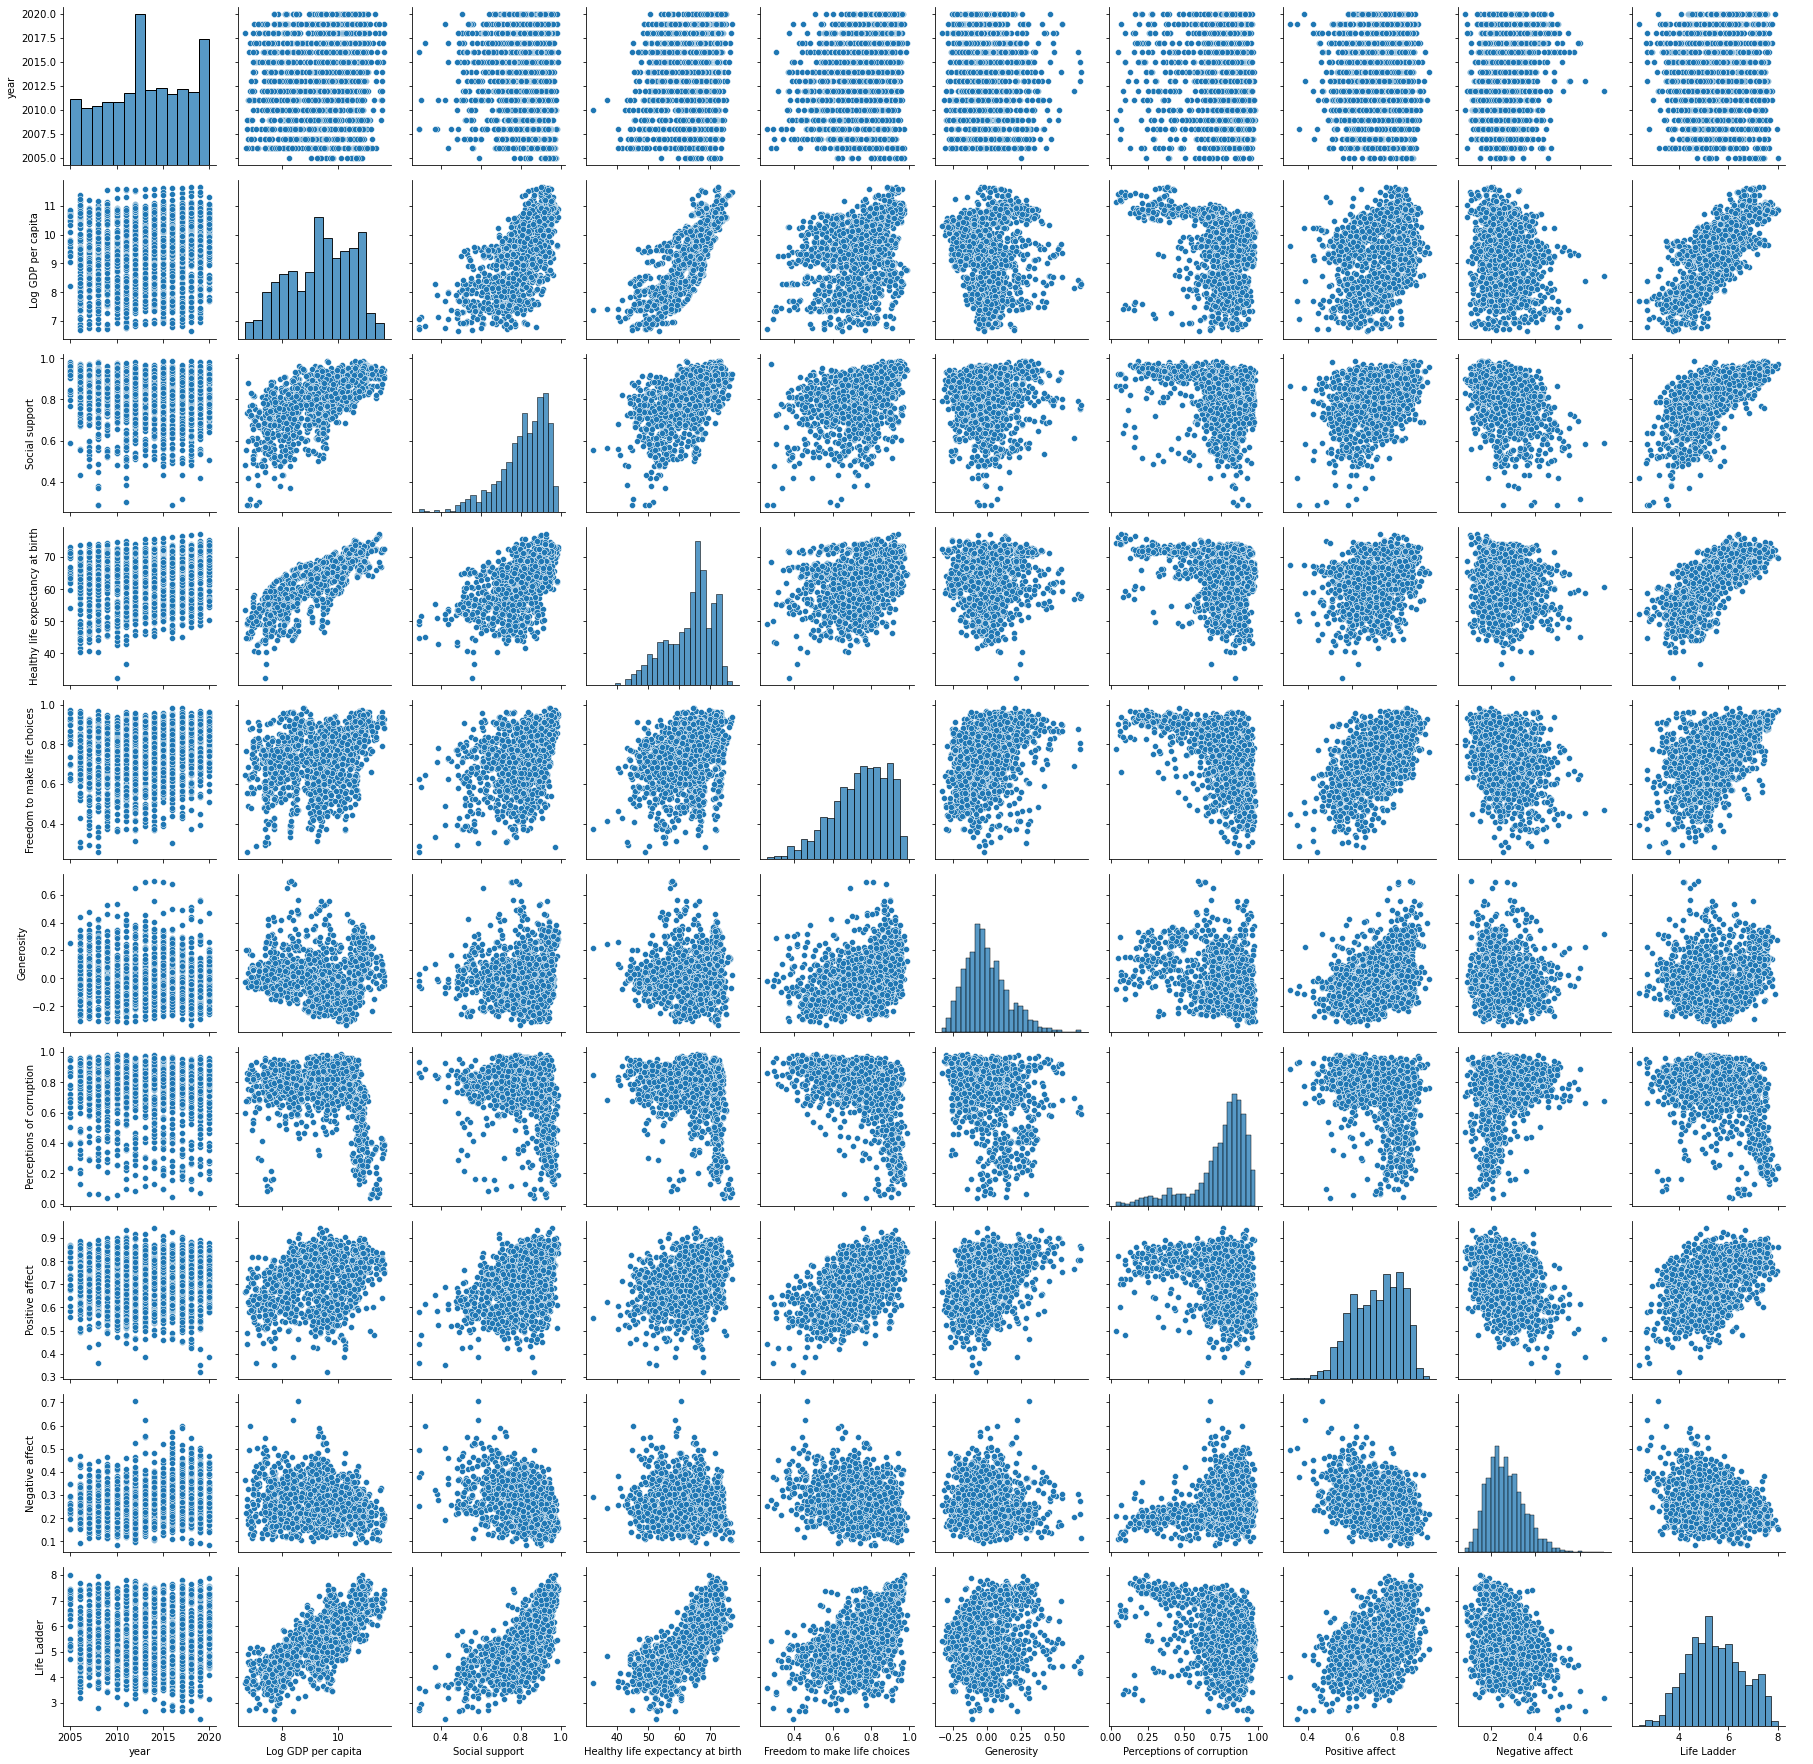

In [225]:
g = sns.PairGrid(happiness_master_data)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

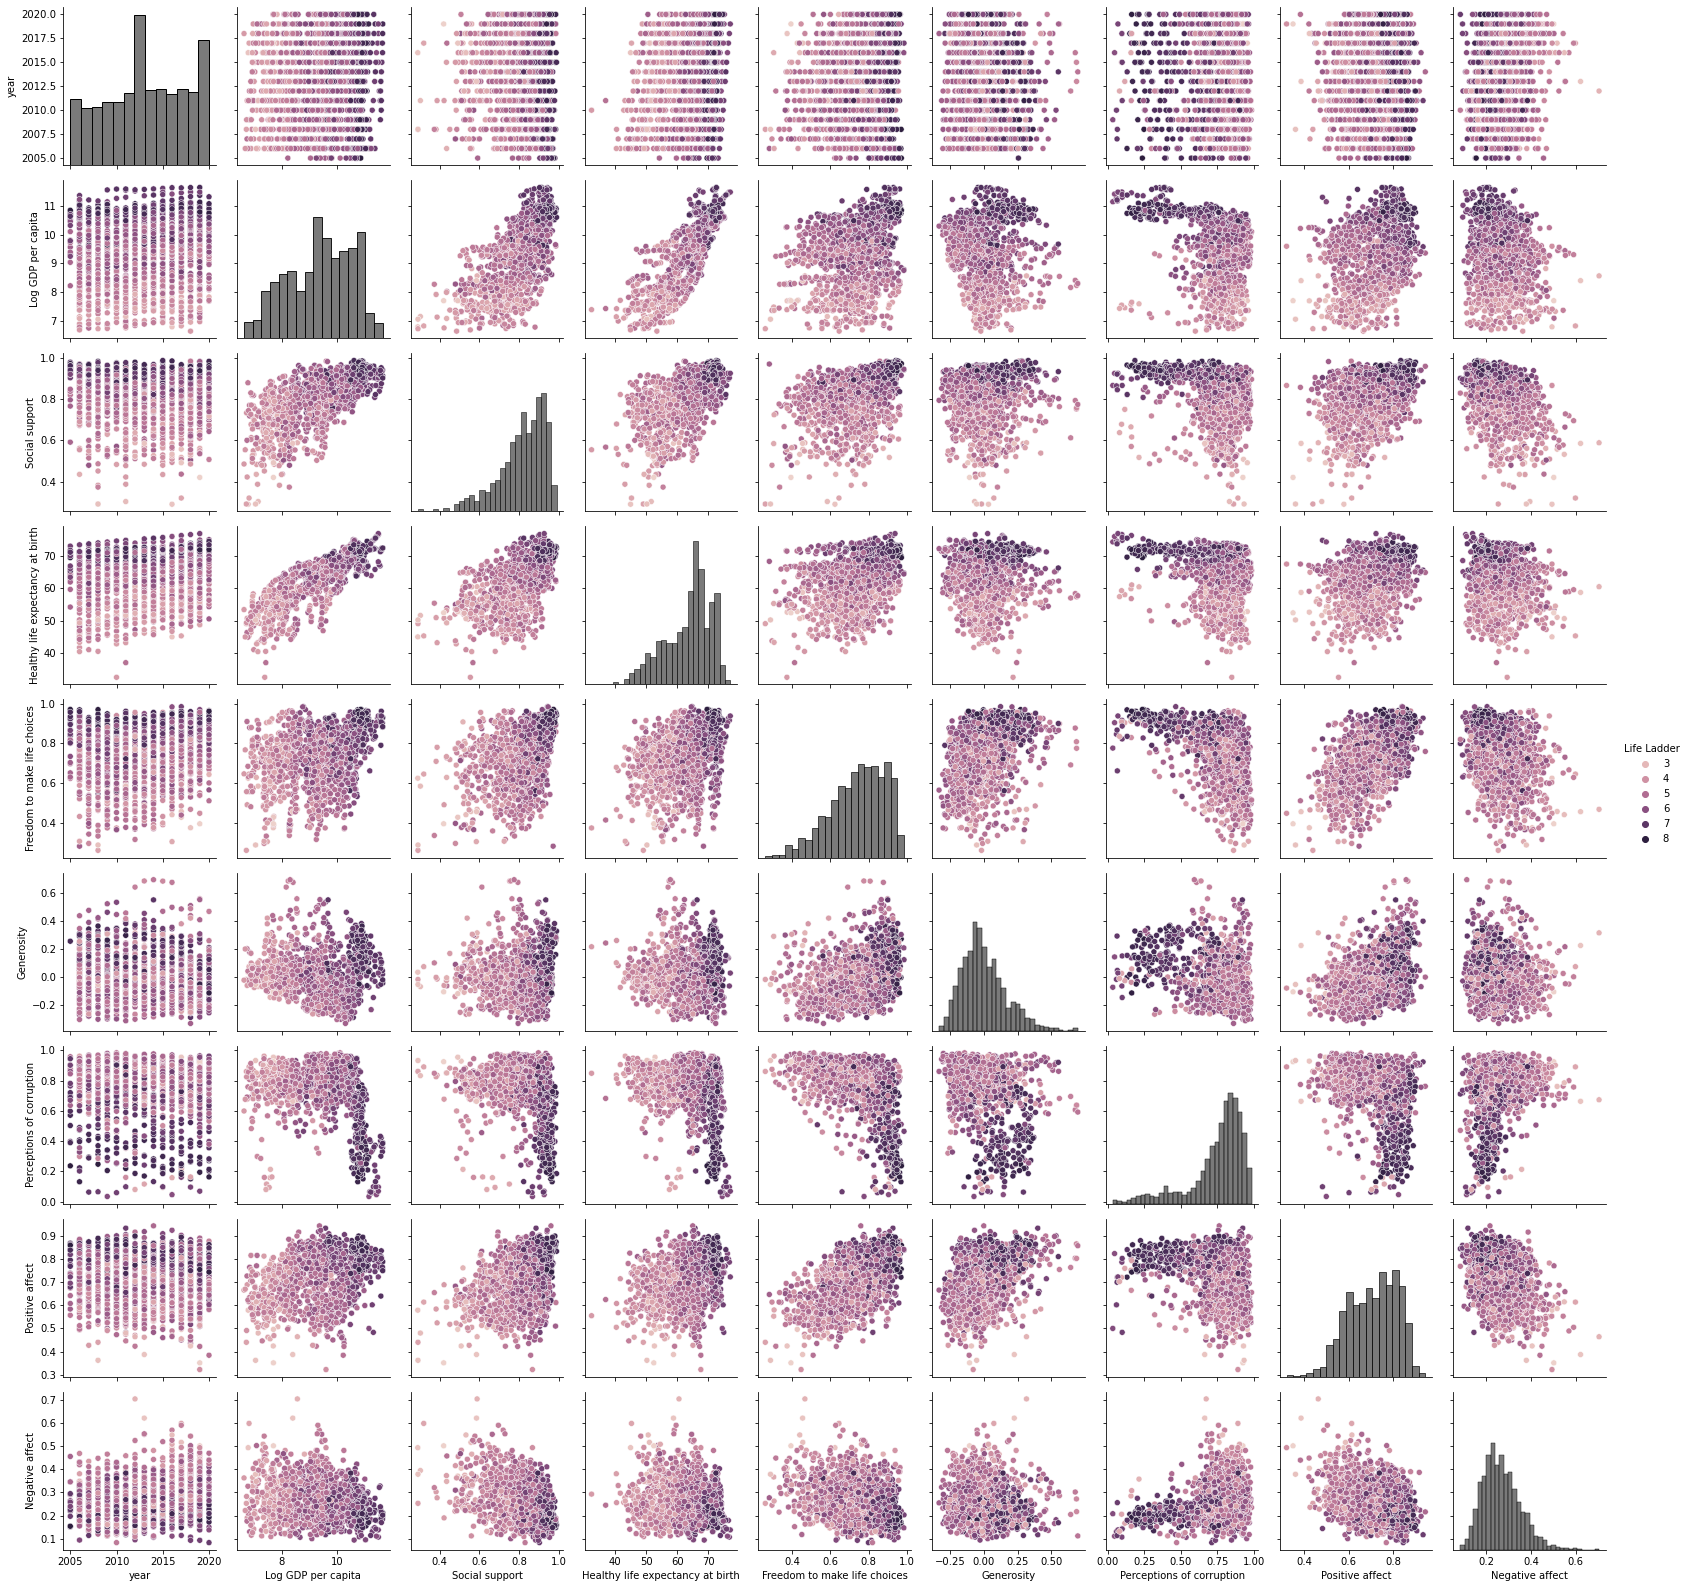

In [226]:
g = sns.PairGrid(happiness_master_data, hue='Life Ladder')
g.map_diag(sns.histplot,hue=None, color=".3")
g.map_offdiag(sns.scatterplot)
g.add_legend()

**Q: What is correlation of Life Ladder across various Numerical features**

Text(0.5, 1.0, 'Correlation between Numerical features and target variable')

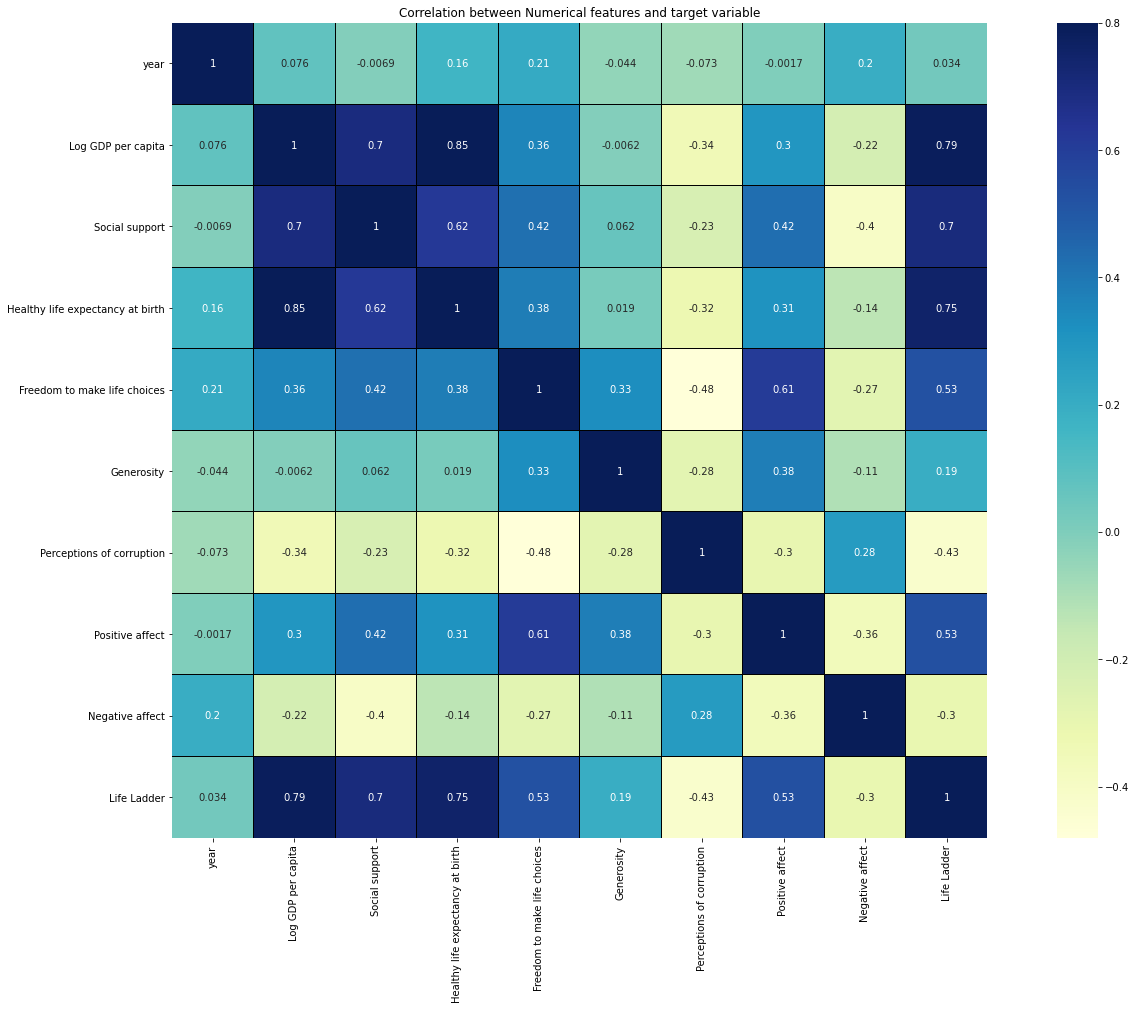

In [227]:
#Check correlation primarily between Numerical linear features and target variable
#Correlation is a measure used to represent how strongly two random variables are related to each other.
#Correlation ranges between -1 and +1
corr = happiness_master_data.corr(method='pearson')
plt.figure(figsize=(25,15))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between Numerical features and target variable')

**Observations:**

- There is positive correlation for **Life Ladder** with **Log GDP per capita**, **Social support** and **Healthy life expectancy at birth**
- There is little positive correlation for **Life Ladder** with **Freedom to make life choices** and **Positive affect**
- There is strong positive correlation for **Log GDP per capita** with **Healthy life expectancy at birth** and **Social support**
- There is positive correlation for **Social support** with **Healthy life expectancy at birth**

In [228]:
#Covariance is a measure to indicate the extent to which two random variables change in tandem.
#Covariance can vary between -∞ and +∞
happiness_master_data.cov()

year  Log GDP per capita  \
year                              17.690657            0.369017   
Log GDP per capita                 0.369017            1.346156   
Social support                    -0.003452            0.095950   
Healthy life expectancy at birth   5.154704            7.376797   
Freedom to make life choices       0.126780            0.059334   
Generosity                        -0.029352           -0.001165   
Perceptions of corruption         -0.057265           -0.074204   
Positive affect                   -0.000777            0.037095   
Negative affect                    0.070804           -0.020770   
Life Ladder                        0.157350            1.015615   

                                  Social support  \
year                                   -0.003452   
Log GDP per capita                      0.095950   
Social support                          0.014104   
Healthy life expectancy at birth        0.558427   
Freedom to make life choices            0.007132   
Generosity                              0.001212   
Perceptions of corruption              -0.005076   
Positive affect                         0.005446   
Negative affect                        -0.004058   
Life Ladder                             0.093080   

                                  Healthy life expectancy at birth  \
year                                                      5.154704   
Log GDP per capita                                        7.376797   
Social support                                            0.558427   
Healthy life expectancy at birth                         55.925078   
Freedom to make life choices                              0.408096   
Generosity                                                0.023404   
Perceptions of corruption                                -0.454301   
Positive affect                                           0.253482   
Negative affect                                          -0.085842   
Life Ladder                                               6.298803   

                                  Freedom to make life choices  Generosity  \
year                                                  0.126780   -0.029352   
Log GDP per capita                                    0.059334   -0.001165   
Social support                                        0.007132    0.001212   
Healthy life expectancy at birth                      0.408096    0.023404   
Freedom to make life choices                          0.020257    0.007573   
Generosity                                            0.007573    0.026695   
Perceptions of corruption                            -0.012835   -0.008456   
Positive affect                                       0.009488    0.006682   
Negative affect                                      -0.003267   -0.001445   
Life Ladder                                           0.084274    0.035362   

                                  Perceptions of corruption  Positive affect  \
year                                              -0.057265        -0.000777   
Log GDP per capita                                -0.074204         0.037095   
Social support                                    -0.005076         0.005446   
Healthy life expectancy at birth                  -0.454301         0.253482   
Freedom to make life choices                      -0.012835         0.009488   
Generosity                                        -0.008456         0.006682   
Perceptions of corruption                          0.034860        -0.006092   
Positive affect                                   -0.006092         0.011670   
Negative affect                                    0.004392        -0.003255   
Life Ladder                                       -0.089717         0.064460   

                                  Negative affect  Life Ladder  
year                                     0.070804     0.157350  
Log GDP per capita                      -0.020770     1.015615  
Social support        

<a name = Section7></a>

---
# **7. Data Post-Processing**
---



<a name = Section71></a>
### **7.1 Handle Missing Value**

- Impute missing value with Median value

In [229]:
y= happiness_master_data['Life Ladder']

In [230]:
happiness_master_data.drop(columns=['Life Ladder','Country name', 'year'], inplace=True)

In [231]:
happiness_master_data.shape

(1559, 8)

In [232]:
happiness_master_data['Log GDP per capita'].fillna(happiness_master_data['Log GDP per capita'].median(), inplace=True)

In [233]:
happiness_master_data['Social support'].fillna(happiness_master_data['Social support'].median(), inplace=True)

In [234]:
happiness_master_data['Healthy life expectancy at birth'].fillna(happiness_master_data['Healthy life expectancy at birth'].median(), inplace=True)

In [235]:
happiness_master_data['Freedom to make life choices'].fillna(happiness_master_data['Freedom to make life choices'].median(), inplace=True)

In [236]:
happiness_master_data['Generosity'].fillna(happiness_master_data['Generosity'].median(), inplace=True)

In [237]:
happiness_master_data['Perceptions of corruption'].fillna(happiness_master_data['Perceptions of corruption'].median(), inplace=True)

In [238]:
happiness_master_data['Positive affect'].fillna(happiness_master_data['Positive affect'].median(), inplace=True)

In [239]:
happiness_master_data['Negative affect'].fillna(happiness_master_data['Negative affect'].median(), inplace=True)

In [240]:
happiness_test_data.drop(columns=['Country name', 'year'], inplace=True)

In [241]:
happiness_test_data.shape

(390, 8)

In [242]:
happiness_test_data['Log GDP per capita'].fillna(happiness_test_data['Log GDP per capita'].median(), inplace=True)

In [243]:
happiness_test_data['Social support'].fillna(happiness_test_data['Social support'].median(), inplace=True)

In [244]:
happiness_test_data['Healthy life expectancy at birth'].fillna(happiness_test_data['Healthy life expectancy at birth'].median(), inplace=True)

In [245]:
happiness_test_data['Freedom to make life choices'].fillna(happiness_test_data['Freedom to make life choices'].median(), inplace=True)

In [246]:
happiness_test_data['Generosity'].fillna(happiness_test_data['Generosity'].median(), inplace=True)

In [247]:
happiness_test_data['Perceptions of corruption'].fillna(happiness_test_data['Perceptions of corruption'].median(), inplace=True)

In [248]:
happiness_test_data['Positive affect'].fillna(happiness_test_data['Positive affect'].median(), inplace=True)

In [249]:
happiness_test_data['Negative affect'].fillna(happiness_test_data['Negative affect'].median(), inplace=True)

<a name = Section72></a>
### **7.2 Data Preparation**

- Now we will **split** our **data** into **dependent** and **independent** variables for further development using holdout validation technique.

In [250]:
# Splitting data into training and testing sets with using Validation Test Data as 25%
X_train, X_test, y_train, y_test = train_test_split(happiness_master_data, y, test_size=0.25, random_state=42)

# Display the shape of training and testing data
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)
X_train.info()
#X_train.columns
X_train.head()

X_train shape:  (1169, 8)
y_train shape:  (1169,)
X_test shape:  (390, 8)
y_test shape:  (390,)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1169 entries, 400 to 685
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Log GDP per capita                1169 non-null   float64
 1   Social support                    1169 non-null   float64
 2   Healthy life expectancy at birth  1169 non-null   float64
 3   Freedom to make life choices      1169 non-null   float64
 4   Generosity                        1169 non-null   float64
 5   Perceptions of corruption         1169 non-null   float64
 6   Positive affect                   1169 non-null   float64
 7   Negative affect                   1169 non-null   float64
dtypes: float64(8)
memory usage: 82.2 KB


Log GDP per capita  Social support  Healthy life expectancy at birth  \
ID                                                                           
400                9.675           0.915                              69.7   
1243               8.436           0.863                              65.5   
403                9.751           0.902                              70.3   
2                  7.647           0.539                              51.6   
1742               9.222           0.863                              65.1   

      Freedom to make life choices  Generosity  Perceptions of corruption  \
ID                                                                          
400                          0.881       0.047                      0.763   
1243                         0.792       0.018                      0.802   
403                          0.898       0.018                      0.813   
2                            0.600       0.121                      0.707   
1742                         0.624      -0.135                      0.732   

      Positive affect  Negative affect  
ID                                      
400             0.886            0.221  
1243            0.805            0.268  
403             0.850            0.278  
2               0.618            0.275  
1742            0.725            0.249

In [251]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
pipe = Pipeline(steps=[("scale", StandardScaler()),
                       ("transform", PowerTransformer()),
("knn", KNeighborsRegressor(n_jobs=-1))])

param_grid = {
    'knn__n_neighbors' : [1,2,3,4,5,6,7,8,9,10]
}

search = GridSearchCV(pipe,param_grid,cv=10)
search.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('transform', PowerTransformer()),
                                       ('knn',
                                        KNeighborsRegressor(n_jobs=-1))]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [252]:
search.best_params_

{'knn__n_neighbors': 3}

In [253]:
search.best_score_

0.8386918546578459

In [254]:
pipe.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()),
  ('transform', PowerTransformer()),
  ('knn', KNeighborsRegressor(n_jobs=-1))],
 'verbose': False,
 'scale': StandardScaler(),
 'transform': PowerTransformer(),
 'knn': KNeighborsRegressor(n_jobs=-1),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'transform__copy': True,
 'transform__method': 'yeo-johnson',
 'transform__standardize': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': -1,
 'knn__n_neighbors': 5,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [255]:
pipe.fit(X_train, y_train)
pred_train = pipe.predict(X_train)
pred_test = pipe.predict(X_test)

In [256]:
RMSE_train = np.sqrt( mean_squared_error(y_train, pred_train))
RMSE_test = np.sqrt(mean_squared_error(y_test, pred_test))
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 0.3397084659138123
RMSE for test set is 0.467396019644463


In [257]:
from sklearn.metrics import r2_score
r2_score_train = r2_score(y_train, pred_train)
r2_score_test = r2_score(y_test, pred_test)

In [258]:
r2_score_train

0.906405486806646

In [259]:
r2_score_test

0.8235912307089464

- Here we will do prediction on Test Dataset (aka Real World Data) using KNN Regression model.

In [260]:
test_pred = pipe.predict(happiness_test_data)

<a name = Section73></a>
### **7.3 Data Scaling**

- Here we can try various scaling options available to arrive at best option
- Here I have decided to not do scaling as of now after trying with different scaling options

<a name = Section8></a>

---
# **8. Model Development & Evaluation**
---

- In this section we will **develop a KNN Regression**

- Then we will **analyze the results** obtained and **make our observations**.

- For **evaluation purpose** we will **focus** on **R2 Score** score as required by this project.

<a name = Section81></a>
### **8.1 Baseline Model Development & Evaluation**

- Here we will develop pipeline using KNN Regression model using K=3

In [261]:
knn_pipe = Pipeline(steps=[("scale", StandardScaler()),
                       ("transform", PowerTransformer()),
("knn", KNeighborsRegressor(n_neighbors=3,n_jobs=-1))])

knn_pipe.fit(X_train, y_train)
cv_score= cross_val_score(knn_pipe, X_train, y_train, cv=10, scoring='r2')
print(cv_score)
print("Average R2")
print(np.mean(cv_score))

[0.82619649 0.82096444 0.83570028 0.82387165 0.86819387 0.76966048
 0.88296043 0.86005608 0.87094232 0.82837251]
Average R2
0.8386918546578459


In [262]:
knn_pipe.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()),
  ('transform', PowerTransformer()),
  ('knn', KNeighborsRegressor(n_jobs=-1, n_neighbors=3))],
 'verbose': False,
 'scale': StandardScaler(),
 'transform': PowerTransformer(),
 'knn': KNeighborsRegressor(n_jobs=-1, n_neighbors=3),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'transform__copy': True,
 'transform__method': 'yeo-johnson',
 'transform__standardize': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': -1,
 'knn__n_neighbors': 3,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [263]:
y_pred_train = knn_pipe.predict(X_train)
y_pred_test = knn_pipe.predict(X_test)

In [264]:
MAE_train = mean_absolute_error(y_train, y_pred_train)
MAE_test = mean_absolute_error(y_test, y_pred_test)

In [265]:
print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

MAE for training set is 0.21645337895637298
MAE for test set is 0.3520367521367521


In [266]:
MSE_train = mean_squared_error(y_train, y_pred_train)
MSE_test = mean_squared_error(y_test, y_pred_test)

In [267]:
print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

MSE for training set is 0.08474304077559168
MSE for test set is 0.21775025099715103


In [268]:
RMSE_train = np.sqrt( mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

In [269]:
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 0.29110657975317505
RMSE for test set is 0.46663717275539784


In [270]:
from sklearn.metrics import r2_score
r2_score_train = r2_score(y_train, y_pred_train)
r2_score_test = r2_score(y_test, y_pred_test)

In [271]:
r2_score_train

0.931270736036146

In [272]:
r2_score_test

0.824163587208378

- Here we will do prediction on Test Dataset (aka Real World Data) using KNN Regression model.

In [273]:
y_test_pred = pipe.predict(happiness_test_data)

In [274]:
output = pd.DataFrame({'ID': happiness_test_data.index,'Life Ladder': test_pred})
output.to_csv('world-happiness-report-submission1.csv', index=False, header=False)

In [275]:
output = pd.DataFrame({'ID': happiness_test_data.index,'Life Ladder': y_test_pred})
output.to_csv('world-happiness-report-submission2.csv', index=False, header=False)

<a name = Section9></a>

---
# **9. Summarization**
---

<a name = Section91></a>
### **9.1 Conclusion**

- KNN Regression Model was used for prediction considering this is ML Advanced project.
- R2 Score was used to arrive at model evaluation which is required for this ML Advanced Project.